In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# define dataset
df = pd.read_csv('mnist_dataset.csv')
df.sample(frac = 1) # shuffle
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# get the data labels
labels = df.loc[:, 'label']
labels = np.array(labels)

hot_encoded_labels = []
for label in labels:
    temp = np.zeros(10)
    temp[label] = 1
    hot_encoded_labels.append(temp)
    
labels = np.array(hot_encoded_labels)
labels.shape

(42000, 10)

In [3]:
# drop the data labels
df = df.drop('label', axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# scale data
data = np.array(df)

scaler = MinMaxScaler()
X = scaler.fit_transform(data)
X.shape

(42000, 784)

In [5]:
X_train = X[:33600]
Y_train = labels[:33600]

X_test = X[-8400:]
Y_test = labels[-8400:]

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(33600, 784)
(33600, 10)
(8400, 784)
(8400, 10)


In [6]:
import nnet

def get_accuracy(Y, Y_hat):
    return np.sum(np.argmax(Y, 0) == np.argmax(Y_hat, 0)) / Y.shape[1]

model = nnet.Sequential([
    nnet.Layer((784, 12), nnet.activation.ReLu),
    nnet.Layer((12, 10), nnet.activation.ReLu),
    nnet.Layer((10, 10), nnet.activation.Softmax)
])

# train the model
model.fit(X_train, Y_train, 120, nnet.loss.CategoricalCrossEntropy, nnet.optimizers.Adam(), accuracy_metric=get_accuracy)

Epoch: 1 Loss: 554243.7232108767  Accuracy: 0.11586309523809524
Epoch: 2 Loss: 408726.76910110295  Accuracy: 0.1250892857142857
Epoch: 3 Loss: 303320.8291640064  Accuracy: 0.13428571428571429
Epoch: 4 Loss: 235683.154391966  Accuracy: 0.14425595238095237
Epoch: 5 Loss: 195555.8420752218  Accuracy: 0.1530952380952381
Epoch: 6 Loss: 170220.44441393684  Accuracy: 0.1593452380952381
Epoch: 7 Loss: 151385.92875046976  Accuracy: 0.16773809523809524
Epoch: 8 Loss: 136207.07775833676  Accuracy: 0.17395833333333333
Epoch: 9 Loss: 123889.29459547687  Accuracy: 0.1825595238095238
Epoch: 10 Loss: 113994.80089594646  Accuracy: 0.18833333333333332
Epoch: 11 Loss: 106072.35754518866  Accuracy: 0.19020833333333334
Epoch: 12 Loss: 99749.75944329811  Accuracy: 0.19288690476190476
Epoch: 13 Loss: 94654.54679147444  Accuracy: 0.19401785714285713
Epoch: 14 Loss: 90529.2672060543  Accuracy: 0.19529761904761905
Epoch: 15 Loss: 87127.99448600283  Accuracy: 0.19788690476190476
Epoch: 16 Loss: 84296.61155886977

In [7]:
# train the model further
model.fit(X_train, Y_train, 100, nnet.loss.CategoricalCrossEntropy, nnet.optimizers.Adam(), accuracy_metric=get_accuracy)

Epoch: 1 Loss: 28625.037062973086  Accuracy: 0.7389285714285714
Epoch: 2 Loss: 27933.972133270814  Accuracy: 0.7466071428571428
Epoch: 3 Loss: 27454.555455503287  Accuracy: 0.7505654761904762
Epoch: 4 Loss: 26870.0577231229  Accuracy: 0.7581547619047619
Epoch: 5 Loss: 26373.816969855106  Accuracy: 0.762529761904762
Epoch: 6 Loss: 25837.61523657555  Accuracy: 0.7665773809523809
Epoch: 7 Loss: 25380.848136580116  Accuracy: 0.7696428571428572
Epoch: 8 Loss: 24967.132981777588  Accuracy: 0.7730654761904762
Epoch: 9 Loss: 24491.32689133938  Accuracy: 0.7780357142857143
Epoch: 10 Loss: 24031.656663523274  Accuracy: 0.7830357142857143
Epoch: 11 Loss: 23668.683374412743  Accuracy: 0.7863392857142857
Epoch: 12 Loss: 23272.994959303527  Accuracy: 0.7888988095238095
Epoch: 13 Loss: 22836.48771877836  Accuracy: 0.7936607142857143
Epoch: 14 Loss: 22460.874474679174  Accuracy: 0.7973214285714286
Epoch: 15 Loss: 22105.446666556105  Accuracy: 0.80125
Epoch: 16 Loss: 21727.53843970245  Accuracy: 0.8043

In [8]:
# get test accuracy
get_accuracy(Y_test.T, model.predict(X_test))

0.9186904761904762

In [9]:
# test model
import matplotlib.pyplot as plt

def test_prediction(index: int):
    current = np.array([X_test[index]])
    
    y_pred = model.predict(current)
    print('Prediction', np.argmax(y_pred, 0)[0])
    print('Label', np.argmax(Y_test[index]))
    
    current_image = current.T.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction 7
Label 7


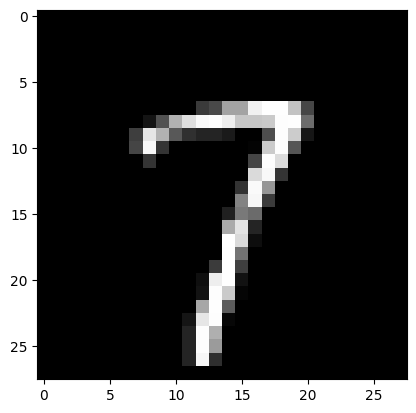

In [10]:
test_prediction(2)

Prediction 2
Label 2


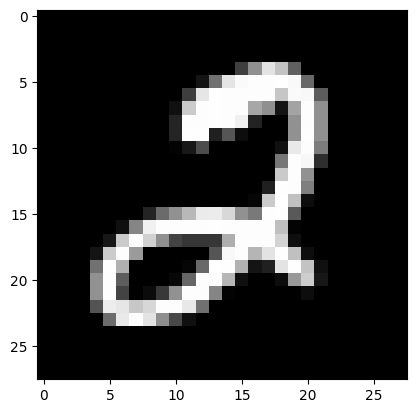

In [11]:
test_prediction(126)

Prediction 3
Label 3


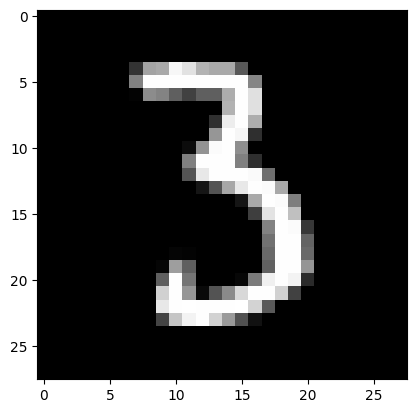

In [12]:
test_prediction(54)

Prediction 9
Label 9


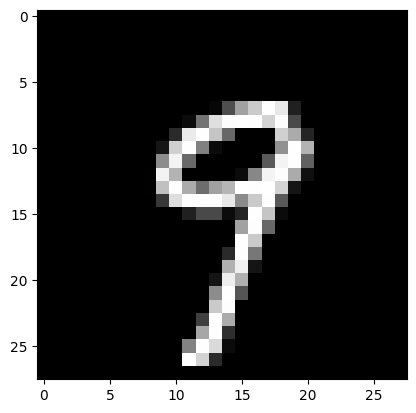

In [13]:
test_prediction(62)

Prediction 8
Label 8


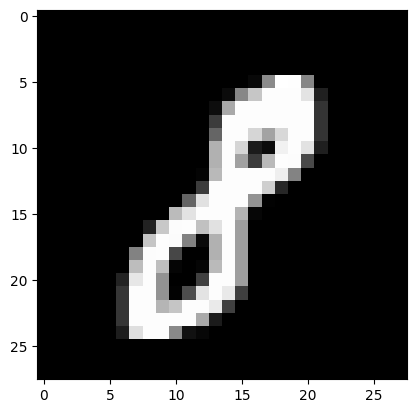

In [14]:
test_prediction(39)

Prediction 5
Label 5


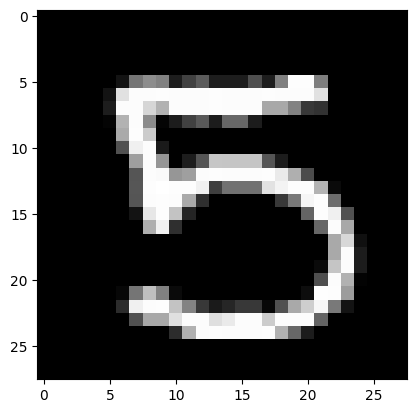

In [21]:
test_prediction(9)